In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
movies=pd.read_csv('my_movies.csv')

In [3]:
movies_x = movies.drop(movies.columns[5:16],axis=1)
movies_x.fillna('null',inplace=True)
movies_x

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,null,null
2,LOTR1,LOTR2,null,null,null
3,Gladiator,Patriot,Sixth Sense,null,null
4,Gladiator,Patriot,Sixth Sense,null,null
5,Gladiator,Patriot,Sixth Sense,null,null
6,Harry Potter1,Harry Potter2,null,null,null
7,Gladiator,Patriot,null,null,null
8,Gladiator,Patriot,Sixth Sense,null,null
9,Sixth Sense,LOTR,Gladiator,Green Mile,null


In [4]:
movies_list = movies_x.to_numpy().tolist()
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart', 'null', 'null'],
 ['LOTR1', 'LOTR2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Harry Potter1', 'Harry Potter2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', 'null']]

In [5]:
j=len(movies_list)
i=0
while i < j:
    while 'null' in movies_list[i]:
        movies_list[i].remove('null')
    i+=1

In [6]:
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]

In [7]:
all_movies_list = [movie for transaction in movies_list for movie in transaction]
print(all_movies_list)
len(all_movies_list)

['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2', 'Gladiator', 'Patriot', 'Braveheart', 'LOTR1', 'LOTR2', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Harry Potter1', 'Harry Potter2', 'Gladiator', 'Patriot', 'Gladiator', 'Patriot', 'Sixth Sense', 'Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']


30

In [8]:
from collections import Counter
from collections import OrderedDict

movie_frequency=Counter(all_movies_list)
print("Old data",movie_frequency)

movie_frequency=sorted(movie_frequency.items(), key = lambda x:x[1]) 
print("\nSorted Data:\n",movie_frequency)

#Split Items and their frequency
frequencies = list(reversed([i[1] for i in movie_frequency]))
movies = list(reversed([i[0] for i in movie_frequency]))

print("\n Movie List:",movies)
print("\n Movie Frequency",frequencies)

Old data Counter({'Gladiator': 7, 'Sixth Sense': 6, 'Patriot': 6, 'LOTR1': 2, 'Harry Potter1': 2, 'Green Mile': 2, 'LOTR2': 2, 'Braveheart': 1, 'Harry Potter2': 1, 'LOTR': 1})

Sorted Data:
 [('Braveheart', 1), ('Harry Potter2', 1), ('LOTR', 1), ('LOTR1', 2), ('Harry Potter1', 2), ('Green Mile', 2), ('LOTR2', 2), ('Sixth Sense', 6), ('Patriot', 6), ('Gladiator', 7)]

 Movie List: ['Gladiator', 'Patriot', 'Sixth Sense', 'LOTR2', 'Green Mile', 'Harry Potter1', 'LOTR1', 'LOTR', 'Harry Potter2', 'Braveheart']

 Movie Frequency [7, 6, 6, 2, 2, 2, 2, 1, 1, 1]


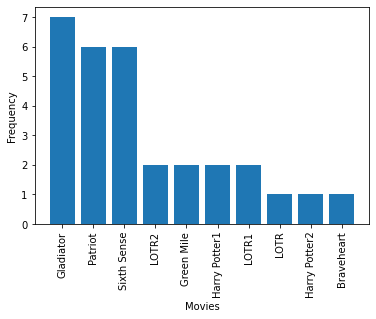

In [9]:
import matplotlib.pyplot as plt

plt.bar (movies,frequencies)
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.show()

In [10]:
movie_series  = pd.DataFrame(pd.Series(movies_list))
movie_series.columns = ["Movie_Series"]
print(movie_series)

                                        Movie_Series
0  [Sixth Sense, LOTR1, Harry Potter1, Green Mile...
1                   [Gladiator, Patriot, Braveheart]
2                                     [LOTR1, LOTR2]
3                  [Gladiator, Patriot, Sixth Sense]
4                  [Gladiator, Patriot, Sixth Sense]
5                  [Gladiator, Patriot, Sixth Sense]
6                     [Harry Potter1, Harry Potter2]
7                               [Gladiator, Patriot]
8                  [Gladiator, Patriot, Sixth Sense]
9         [Sixth Sense, LOTR, Gladiator, Green Mile]


In [11]:
X = movie_series['Movie_Series'].str.join(sep='*')
print(X)

0    Sixth Sense*LOTR1*Harry Potter1*Green Mile*LOTR2
1                        Gladiator*Patriot*Braveheart
2                                         LOTR1*LOTR2
3                       Gladiator*Patriot*Sixth Sense
4                       Gladiator*Patriot*Sixth Sense
5                       Gladiator*Patriot*Sixth Sense
6                         Harry Potter1*Harry Potter2
7                                   Gladiator*Patriot
8                       Gladiator*Patriot*Sixth Sense
9               Sixth Sense*LOTR*Gladiator*Green Mile
Name: Movie_Series, dtype: object


In [12]:
X= X.str.get_dummies(sep='*')
X

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [13]:
frequent_movies = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
print("Raw Data:\n",frequent_movies.head())

frequent_movies.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies.head())

Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
14      0.6      (Patriot, Gladiator)
8       0.6                 (Patriot)
9       0.6             (Sixth Sense)
15      0.5  (Sixth Sense, Gladiator)


In [14]:
rules = association_rules(frequent_movies, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
18,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
77,(LOTR1),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
74,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
72,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
...,...,...,...,...,...,...,...,...,...
10,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
31,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0


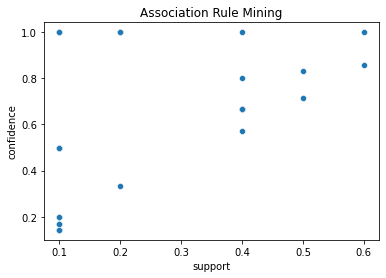

In [15]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


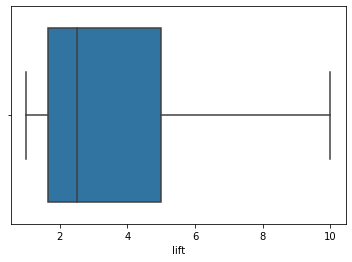

In [16]:
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

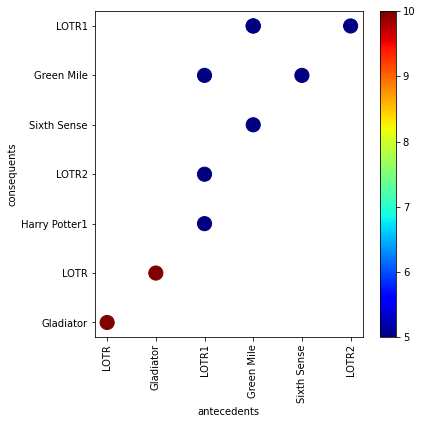

In [17]:
X1 = rules.antecedents.iloc[0:10]
Y1 = rules.consequents.iloc[0:10]
Z1 = rules.lift.iloc[0:10]


X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [18]:
B = movie_series['Movie_Series'].str.join(sep='*')
B= B.str.get_dummies(sep='*')
B

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [19]:
frequent_movies1 = apriori(B, min_support=0.002, max_len=2,use_colnames = True)
print("Raw Data:\n",frequent_movies1.head())

frequent_movies1.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies1.head())

Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
8       0.6                 (Patriot)
14      0.6      (Patriot, Gladiator)
9       0.6             (Sixth Sense)
15      0.5  (Sixth Sense, Gladiator)


In [20]:
rules1 = association_rules(frequent_movies1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
23,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
22,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
17,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
14,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
24,(Harry Potter1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
21,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
20,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60


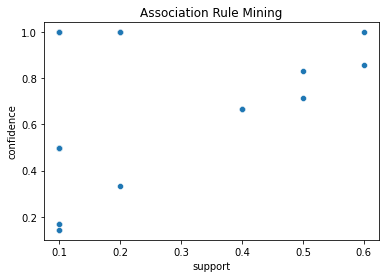

In [21]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule Mining")
plt.show()

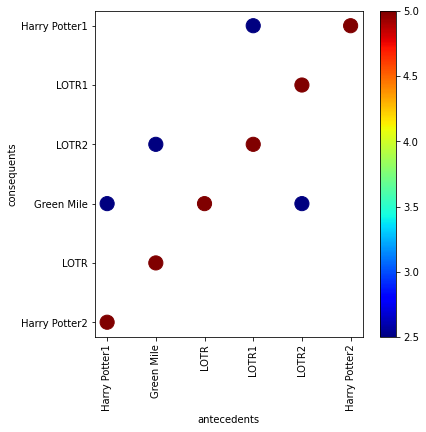

In [22]:
X1 = rules1.antecedents.iloc[0:10]
Y1 = rules1.consequents.iloc[0:10]
Z1 = rules1.lift.iloc[0:10]


X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [23]:
df= pd.read_csv('my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [24]:
df.drop(columns=['V1','V2','V3','V4','V5'],inplace=True,axis=1)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [25]:
frequent_itemsets=apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [26]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR2),"(LOTR1, Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR1, Harry Potter1, Green Mile, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [27]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
210,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
225,"(LOTR1, Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
183,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
138,"(Sixth Sense, Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
198,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
173,"(Harry Potter1, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
201,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
109,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [28]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR2),"(LOTR1, Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR1, Harry Potter1, Green Mile, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


<AxesSubplot:xlabel='support', ylabel='confidence'>

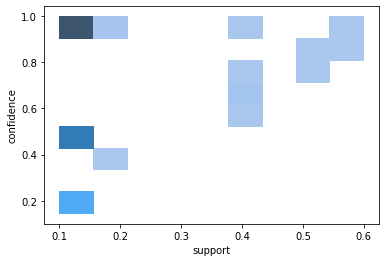

In [29]:
sns.histplot(x='support',y='confidence',data=rules)

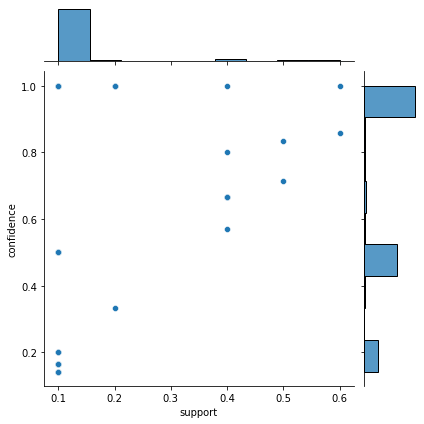

In [30]:
sns.jointplot(x='support',y='confidence',data=rules)